# Explorasi Data  

Eksplorasi data bertujuan untuk memahami karakteristik dataset sebelum dilakukan analisis lanjutan.  
Tahapan ini meliputi analisis numerik, visualisasi, serta interpretasi.  

## Load Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca dataset gabungan
df_combined = pd.read_csv("data_gabungan_iris.csv")

# Lihat 5 baris pertama
df_combined.head()


,id,class,petallength,petalwidth,sepallength,sepalwidth
0,1,Iris-setosa,1.4,0.2,5.1,3.5
1,2,Iris-setosa,1.4,0.2,4.9,3.0
2,3,Iris-setosa,1.3,0.2,4.7,3.2
3,4,Iris-setosa,1.5,0.2,4.6,3.1
4,5,Iris-setosa,1.4,0.2,5.0,3.6


Berikut adalah beberapa analisis yang dilakukan:  

## 1. Nilai Minimum dan Maksimum

Nilai minimum dan maksimum digunakan untuk melihat **rentang (range)** dari setiap fitur numerik.  
Hal ini membantu memahami seberapa lebar penyebaran data.  

In [4]:
print("Nilai minimum tiap kolom:")
print(df_combined.min(numeric_only=True))

print("\nNilai maksimum tiap kolom:")
print(df_combined.max(numeric_only=True))


Nilai minimum tiap kolom:
id             1.0
petallength    1.0
petalwidth     0.1
sepallength    4.3
sepalwidth     2.0
dtype: float64

Nilai maksimum tiap kolom:
id             150.0
petallength      6.9
petalwidth       2.5
sepallength      7.9
sepalwidth       4.4
dtype: float64


- Menunjukkan rentang data tiap fitur.  
- Pada dataset iris biasanya:
    - Sepal length: 4.3 – 7.9
    - Sepal width: 2.0 – 4.4
    - Petal length: 1.0 – 6.9
    - Petal width: 0.1 – 2.5

## 2. Nilai Rata-rata (Mean)  
Rata-rata memberikan gambaran **titik tengah** distribusi data.  
Dengan ini, kita bisa tahu fitur mana yang memiliki skala lebih besar.  


In [5]:
print("Rata-rata tiap kolom:")
print(df_combined.mean(numeric_only=True))


Rata-rata tiap kolom:
id             75.500000
petallength     3.758667
petalwidth      1.198667
sepallength     5.843333
sepalwidth      3.054000
dtype: float64


- Rata-rata sepal lebih besar dibanding petal.
- Rata-rata membantu perbandingan antar fitur.

## 3. Distribusi Jumlah Data Tiap Kelas

Distribusi kelas penting untuk memastikan dataset **seimbang** (tidak ada kelas yang dominan).  


Jumlah data tiap kelas:
class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


C:\Users\acer\AppData\Local\Temp\ipykernel_8984\764761306.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


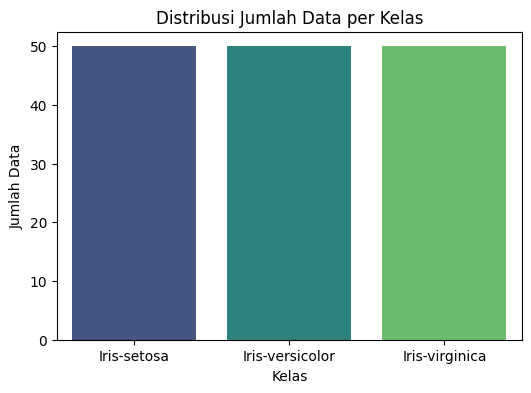

In [6]:
class_counts = df_combined["class"].value_counts()

print("Jumlah data tiap kelas:")
print(class_counts)

plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Distribusi Jumlah Data per Kelas")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Data")
plt.show()


- Dataset iris seimbang → masing-masing kelas ± 50 data.
- Tidak ada kelas yang dominan → cocok untuk model klasifikasi.  

## 4. Standard Deviation

Standard deviation menunjukkan **sebaran data**.  
Semakin besar nilainya, semakin menyebar data dari rata-rata.  


In [7]:
print("Standard deviation tiap kolom:")
print(df_combined.std(numeric_only=True))


Standard deviation tiap kolom:
id             43.445368
petallength     1.764420
petalwidth      0.763161
sepallength     0.828066
sepalwidth      0.433594
dtype: float64


- Petal length dan petal width memiliki variasi besar antar kelas.
- Sepal width variasinya lebih kecil.  

## 5. Korelasi Antar Fitur

Korelasi digunakan untuk melihat hubungan antar fitur numerik.  
Nilai korelasi:  
- 1 = hubungan positif sempurna  
- -1 = hubungan negatif sempurna  
- 0 = tidak ada hubungan  


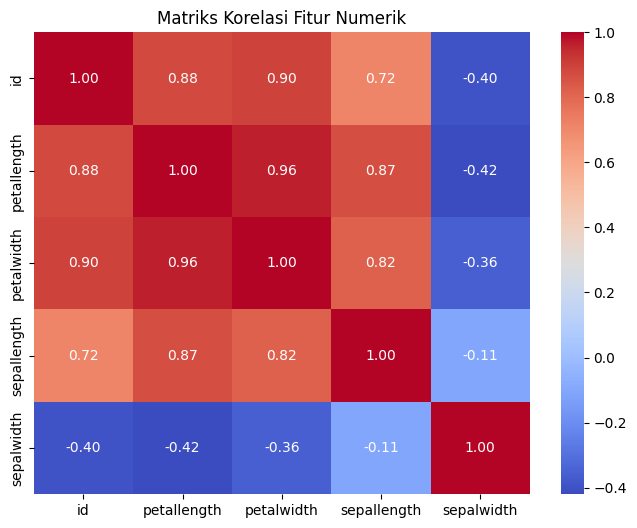

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df_combined.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi Fitur Numerik")
plt.show()


- Petal length ↔ Petal width → korelasi sangat tinggi.
- Sepal width cenderung kurang berkorelasi dengan fitur lain.  

## 6. Rata-rata Fitur per Kelas

Analisis ini menunjukkan ciri khas masing-masing kelas berdasarkan fitur numerik.  

In [9]:
df_combined.groupby("class").mean(numeric_only=True)


,id,petallength,petalwidth,sepallength,sepalwidth
class,,,,,
Iris-setosa,25.5,1.464,0.244,5.006,3.418
Iris-versicolor,75.5,4.260,1.326,5.936,2.770
Iris-virginica,125.5,5.552,2.026,6.588,2.974


- Setosa → petal kecil, sepal sedang.
- Versicolor → ukuran menengah.
- Virginica → petal besar, sepal panjang.

## 7. Distribusi Setiap Fitur (Histogram)

Histogram memperlihatkan **sebaran data** tiap fitur.  


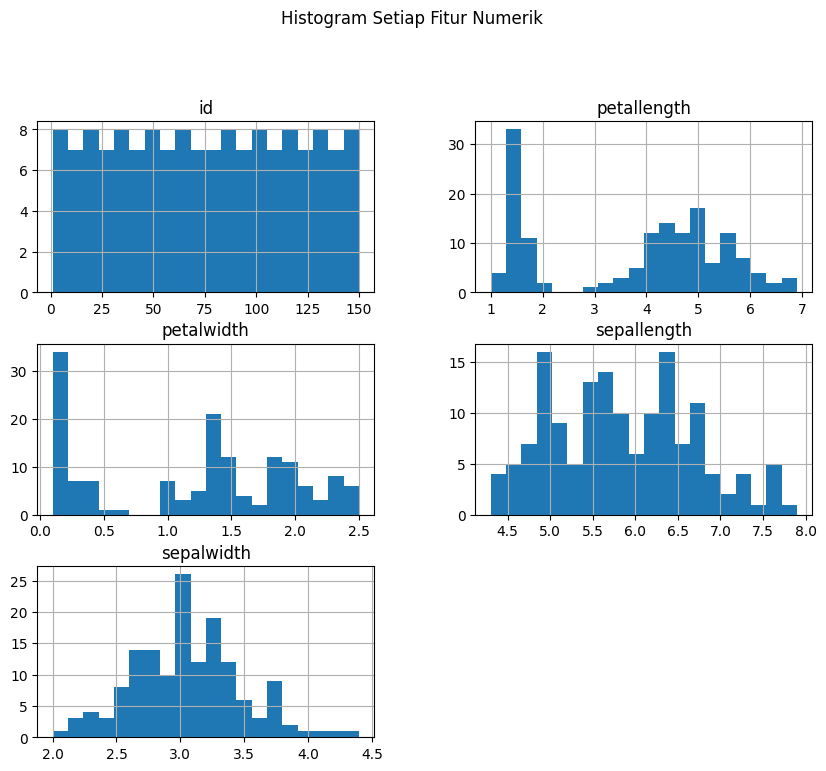

In [10]:
df_combined.hist(figsize=(10,8), bins=20)
plt.suptitle("Histogram Setiap Fitur Numerik", y=1.02)
plt.show()


- Distribusi fitur tidak selalu normal.
- Petal length jelas membedakan kelas.

## 8. Pairplot Antar Fitur

Pairplot memvisualisasikan hubungan antar fitur, sekaligus distribusi kelas.  


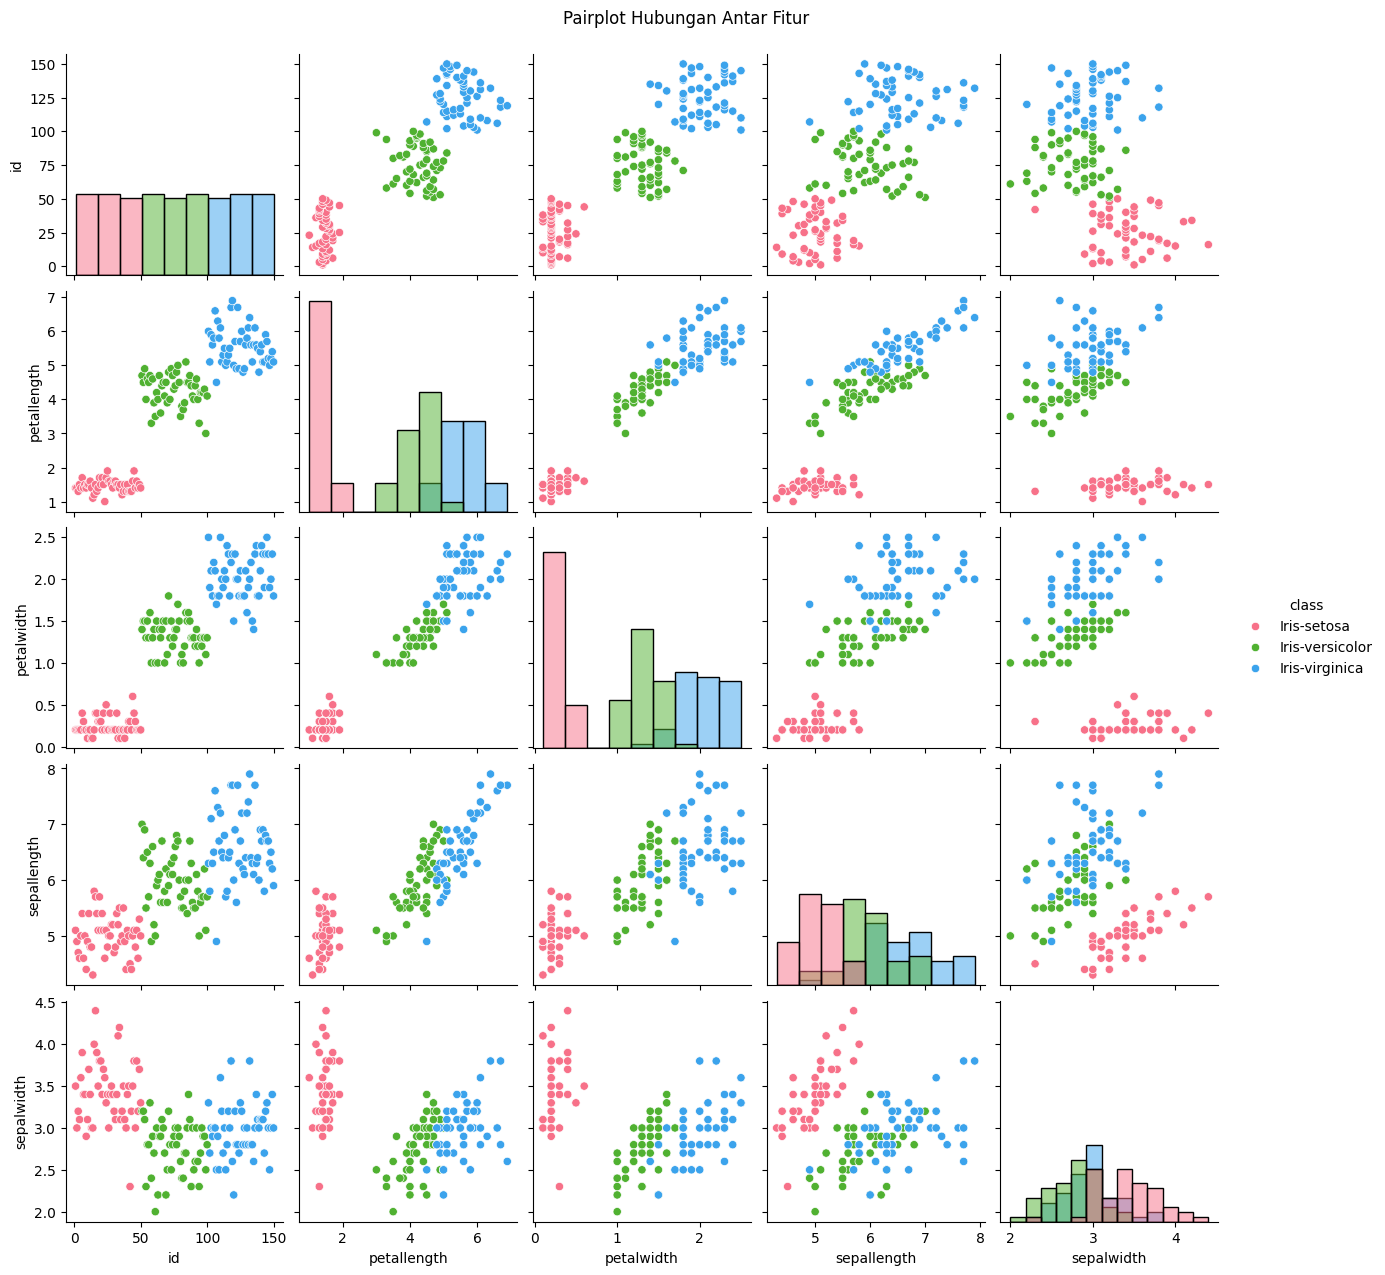

In [11]:
sns.pairplot(df_combined, hue="class", diag_kind="hist", palette="husl")
plt.suptitle("Pairplot Hubungan Antar Fitur", y=1.02)
plt.show()


- Petal length vs petal width → pemisahan kelas sangat jelas.
- Sepal length vs sepal width → tumpang tindih antar kelas.

## 9. Boxplot Tiap Fitur Berdasarkan Kelas

Boxplot membantu melihat distribusi fitur antar kelas, termasuk median dan outlier.  


C:\Users\acer\AppData\Local\Temp\ipykernel_8984\1952158657.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="class", y=col, data=df_combined, palette="Set2")
C:\Users\acer\AppData\Local\Temp\ipykernel_8984\1952158657.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="class", y=col, data=df_combined, palette="Set2")
C:\Users\acer\AppData\Local\Temp\ipykernel_8984\1952158657.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="class", y=col, data=df_combined, palette="Set2")
C:\Users\acer\AppData\Local\Temp\ipykernel_8984\1952158657

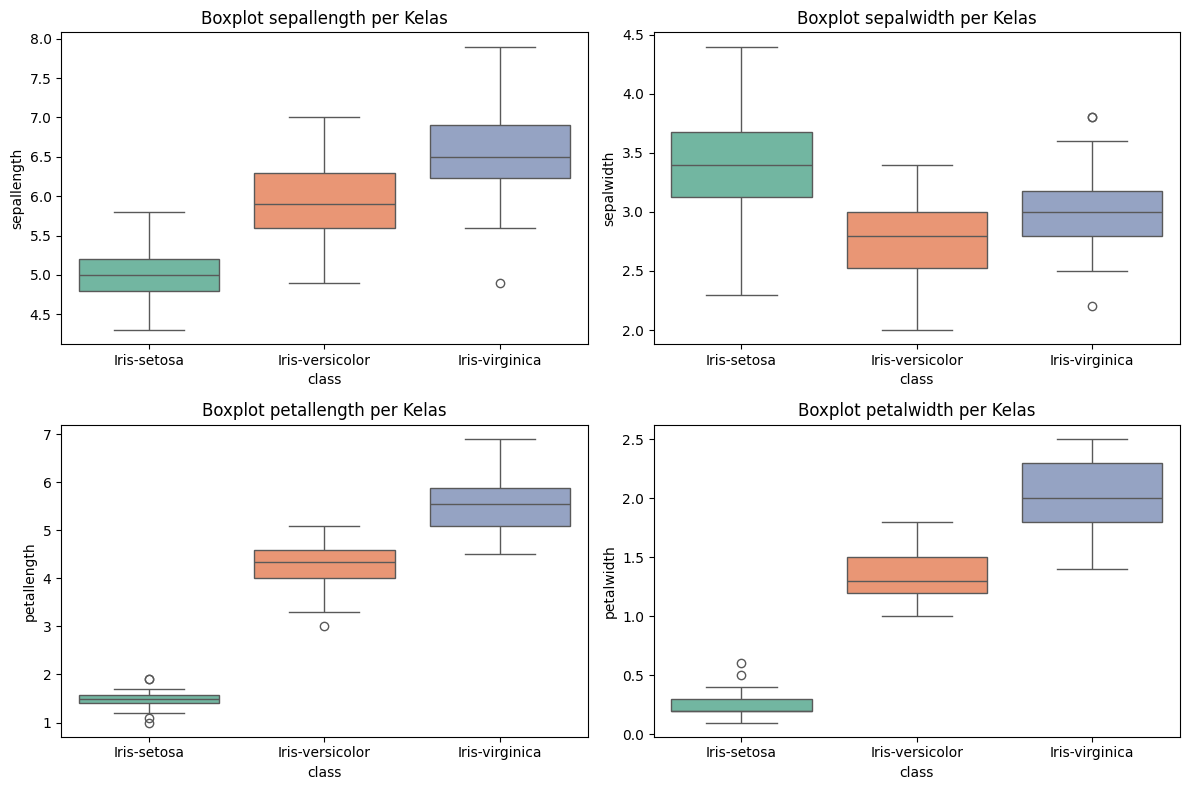

In [12]:
plt.figure(figsize=(12,8))
for i, col in enumerate(["sepallength", "sepalwidth", "petallength", "petalwidth"], 1):
    plt.subplot(2,2,i)
    sns.boxplot(x="class", y=col, data=df_combined, palette="Set2")
    plt.title(f"Boxplot {col} per Kelas")
plt.tight_layout()
plt.show()


- Petal length & width → membedakan kelas dengan jelas.
- Sepal width → banyak overlap antar kelas.

## 10. Violin Plot Distribusi Fitur

Violin plot menunjukkan distribusi lengkap tiap fitur berdasarkan kelas.  


C:\Users\acer\AppData\Local\Temp\ipykernel_8984\3481853485.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="class", y=col, data=df_combined, palette="Pastel1")
C:\Users\acer\AppData\Local\Temp\ipykernel_8984\3481853485.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="class", y=col, data=df_combined, palette="Pastel1")
C:\Users\acer\AppData\Local\Temp\ipykernel_8984\3481853485.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="class", y=col, data=df_combined, palette="Pastel1")
C:\Users\acer\AppData\Local\Temp\ipykern

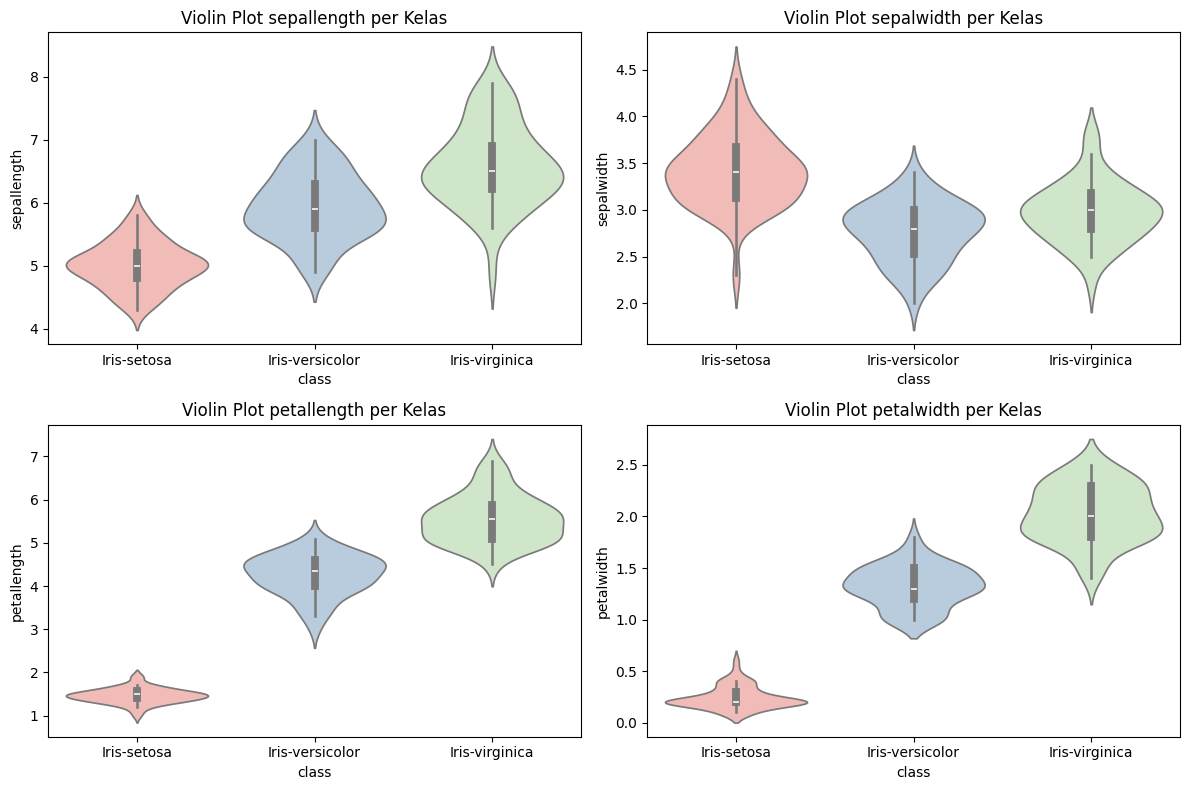

In [13]:
plt.figure(figsize=(12,8))
for i, col in enumerate(["sepallength", "sepalwidth", "petallength", "petalwidth"], 1):
    plt.subplot(2,2,i)
    sns.violinplot(x="class", y=col, data=df_combined, palette="Pastel1")
    plt.title(f"Violin Plot {col} per Kelas")
plt.tight_layout()
plt.show()


- Virginica memiliki distribusi petal yang lebih tinggi.
- Setosa distribusinya terpisah jauh dari dua kelas lain.

## 11. Scatter Plot Antar Fitur

Scatter plot digunakan untuk melihat pemisahan kelas secara visual.  


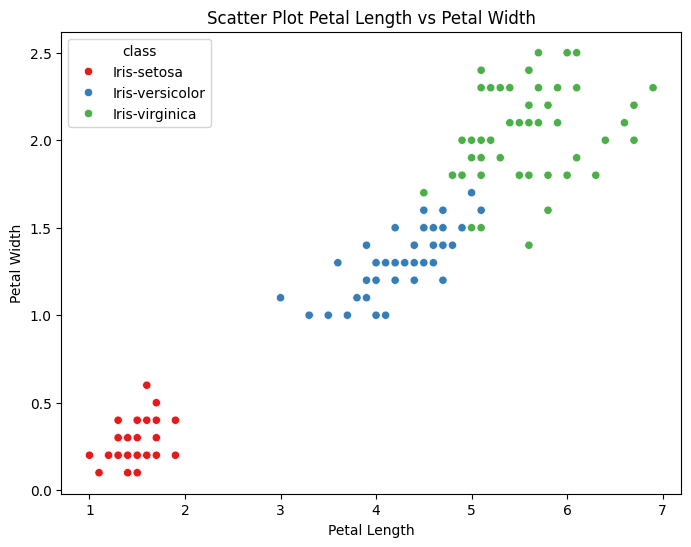

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="petallength", y="petalwidth", hue="class", data=df_combined, palette="Set1")
plt.title("Scatter Plot Petal Length vs Petal Width")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()


Scatter plot petal length vs width → memisahkan kelas hampir sempurna.

## Kesimpulan Eksplorasi Data

1. Dataset memiliki distribusi kelas **seimbang** (setosa, versicolor, virginica masing-masing 50 data).
2. Fitur **petal length** dan **petal width** paling kuat dalam membedakan kelas.  
3. Fitur **sepal length** dan **sepal width** kurang informatif karena distribusinya tumpang tindih.  
4. Korelasi tertinggi antara petal length & petal width (hubungan positif).  
5. Tidak ada anomali besar, hanya sedikit outlier pada sepal width.  
6. Dataset sudah **bersih, seimbang, dan informatif** untuk analisis klasifikasi.  
